## Observations and Insights

1. The drugs are fairly evenly tested.
2. The gender of the mice are evenly distributed.
3. There are only three drugs that seem to make a difference, identified by the min value.
4. Capomulin and Ramicane look very promising.
5. There is one outlier on Infubinol.
6. There is an expected marginal correlation between weight and tumor size.

## Dependencies and starter code

In [1]:
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
#combined_results.to_excel("combined.xlsx")
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# set how we want to see our floats
pd.options.display.float_format = '{:,.2f}'.format

# # output
# print(table)
# Create a group based on the values in the 'Regimen' column
regimen_group = combined_results.groupby('Drug Regimen')

# Stats on tumor volume by Regimen, start with mean
stats_df = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].mean())

# Add median
median_df = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].median())
stats_df = pd.merge(stats_df, median_df, on='Drug Regimen', how='outer')

# Add Variance
var_df = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].var())
stats_df = pd.merge(stats_df, var_df, on='Drug Regimen', how='outer')

# Add std
std_df = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].std())
stats_df = pd.merge(stats_df, std_df, on='Drug Regimen', how='outer')

# Add sem
sem_df = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].sem())
stats_df = pd.merge(stats_df, sem_df, on='Drug Regimen', how='outer')

# Name the columns correctly
stats_df.columns = ['Mean', 'Median', 'Variance', 'Std', 'SEM']

stats_df



,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

In [4]:
# Add count
count_df = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].count())
stats_df = pd.merge(stats_df, count_df, on='Drug Regimen', how='left')

# Add min
min_df = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].min())
stats_df = pd.merge(stats_df, min_df, on='Drug Regimen', how='left')

# Add max
max_df = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].max())
stats_df = pd.merge(stats_df, max_df, on='Drug Regimen', how='left')

# # Add first
# first_df = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].iloc[0])
# stats_df = pd.merge(stats_df, first_df, on='Drug Regimen', how='left')

# # Add last
# last_df = pd.DataFrame(regimen_group['Tumor Volume (mm3)'])
# stats_df = pd.merge(stats_df, last_df, on='Drug Regimen', how='left')

# Name the columns correctly
stats_df.columns = ['Mean', 'Median', 'Variance', 'Std', 'SEM', 'Count', 'Min', 'Max']

stats_df



,Mean,Median,Variance,Std,SEM,Count,Min,Max
Drug Regimen,,,,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33,230,23.34,48.16
Ceftamin,52.59,51.78,39.29,6.27,0.47,178,45.00,68.92
Infubinol,52.88,51.82,43.13,6.57,0.49,178,36.32,72.23
Ketapril,55.24,53.70,68.55,8.28,0.60,188,45.00,78.57
Naftisol,54.33,52.51,66.17,8.13,0.60,186,45.00,76.67
Placebo,54.03,52.29,61.17,7.82,0.58,181,45.00,73.21
Propriva,52.32,50.85,42.35,6.51,0.51,161,45.00,72.46
Ramicane,40.22,40.67,23.49,4.85,0.32,228,22.05,47.62
Stelasyn,54.23,52.43,59.45,7.71,0.57,181,45.00,75.12


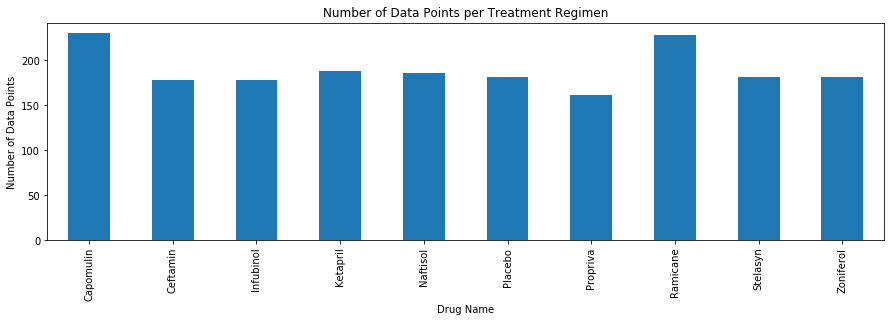

<Figure size 432x288 with 0 Axes>

In [5]:
# # # Generate a bar plot showing number of data points for each treatment regimen using pandas
count = stats_df.Count
count.plot(kind="bar", figsize=(15,4))

# Set a title for the chart
plt.title("Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Name")
plt.ylabel("Number of Data Points")

plt.show()
plt.tight_layout()


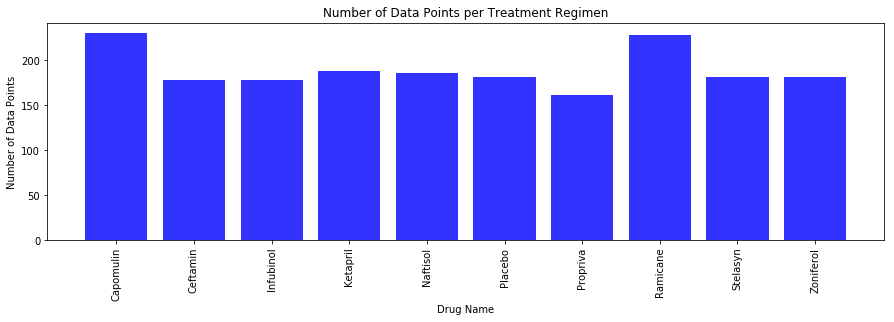

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set x axis and tick locations
x_axis = np.arange(len(stats_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,4))
plt.bar(x_axis, stats_df["Count"], color='b', alpha=0.8, align="center")
plt.xticks(tick_locations, stats_df.index, rotation="vertical")
plt.title("Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Name")
plt.ylabel("Number of Data Points")

plt.show()
plt.tight_layout()

## Pie plots

In [7]:
unique_mice_df = combined_results.drop_duplicates('Mouse ID')

gender_df = unique_mice_df.groupby(['Sex']).count()

gender_df.head()


,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,124,124,124,124,124,124,124
Male,125,125,125,125,125,125,125


(-1.1016630746735625,
 1.1000791940320744,
 -1.1009347297692742,
 1.1017685314144794)

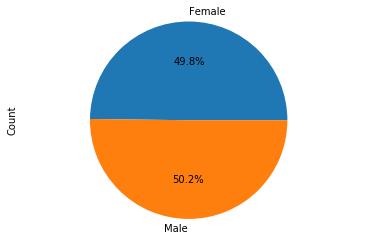

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = gender_df.rename(columns={"Mouse ID": "Count"})

gender_df.head()
gender_df.plot.pie(y='Count', legend=False, autopct='%1.1f%%')
plt.axis("equal")


(-1.1016630746735625,
 1.1000791940320744,
 -1.1009347297692742,
 1.1017685314144794)

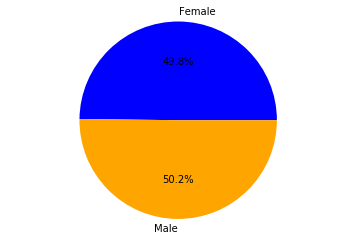

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# The colors of each section of the pie chart
colors = ["blue", "orange"]

plt.pie(gender_df['Count'], labels=gender_df.index, colors=colors,
        autopct="%1.1f%%", shadow=False,)
plt.axis("equal")


## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
stats_df = stats_df.sort_values(by=['Min'], ascending='True')
stats_df.head(4)
top_stats_df = stats_df.iloc[0:4]
top_stats_df

top_regimens = pd.Series(top_stats_df.index)
top_regimens.head()

# get the last item for each mouse
last_unique_mice_df = combined_results.drop_duplicates('Mouse ID', keep='last')
# last_unique_mice_df

# keep rows that are for the top regimens
last_unique_mice_df = last_unique_mice_df.loc[last_unique_mice_df['Drug Regimen'].isin(top_regimens)]
# last_unique_mice_df

# last_unique_mice_df = last_unique_mice_df.sort_values(by=['Drug Regimen'], ascending='True')
# last_unique_mice_df.head()

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = last_unique_mice_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile is: 37.187743802499995
The upper quartile is: 59.930261755000004
The interquartile is: 22.74251795250001
The the median is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


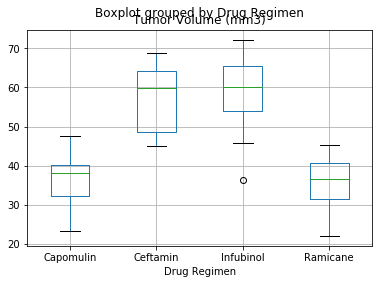

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

last_unique_mice_df.boxplot(by="Drug Regimen", column="Tumor Volume (mm3)")

# fig1, ax1 = plt.subplots()
# ax1.set_title('Tumor Volumes by Regimen')
# ax1.set_ylabel('Tumor Volume (mm3)')

# ax1.boxplot(last_unique_mice_df['Tumor Volume (mm3)'])
# plt.show()

# ax.boxplot(my_dict.values())
# ax.set_xticklabels(my_dict.keys()))

## Line and scatter plots

In [12]:
# Separte out Capomulin
cap_df = combined_results.loc[combined_results['Drug Regimen'] == 'Capomulin']
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.00,0
11,s185,Capomulin,Female,3,17,5,43.88,0
12,s185,Capomulin,Female,3,17,10,37.61,0
13,s185,Capomulin,Female,3,17,15,38.18,0
14,s185,Capomulin,Female,3,17,20,36.87,0


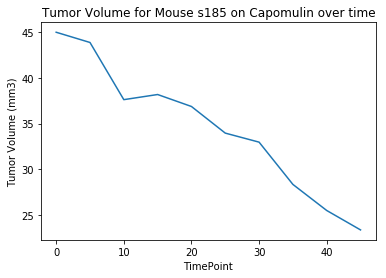

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse185 = cap_df.loc[cap_df['Mouse ID'] == 's185']
mouse185

x_axis = mouse185['Timepoint']
y_axis = mouse185['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.title("Tumor Volume for Mouse s185 on Capomulin over time")
plt.xlabel("TimePoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

The correlation between both factors is 0.53


Text(20,25,'y = 0.96x + 21.49')

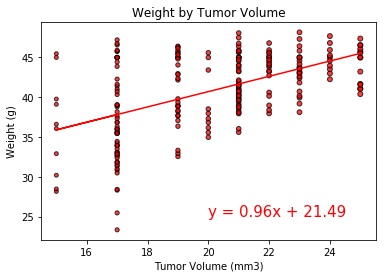

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Annotate in the regression
x_axis = cap_df['Weight (g)']
y_axis = cap_df['Tumor Volume (mm3)']

# Calculate the correlation coefficient and linear regression model for mouse weight and 
# average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")


cap_df.head(400)
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

# get and add the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.title("Weight by Tumor Volume")
plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

